In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("Diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)
df

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.describe()

,id,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Figure size 1500x1200 with 0 Axes>

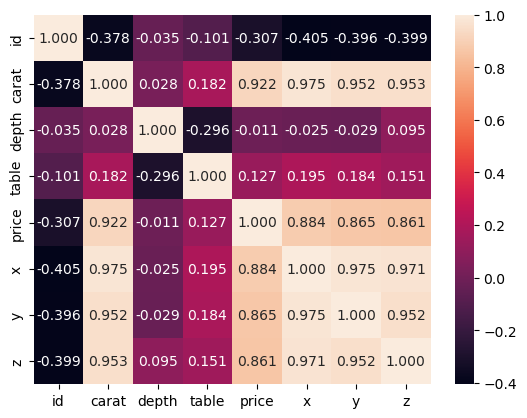

<Figure size 1500x1200 with 0 Axes>

In [9]:
# give me the columns of df who are numerical
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# # plot the correlation matrix
import matplotlib.pyplot as plt

df_numerical = df[numerical_columns]

sns.heatmap(df_numerical.corr(), annot=True, fmt=".3f")
plt.figure(figsize=(15,12))

In [6]:
print("Values per non-numerical feature")

print("Cut", len(df['cut'].unique()))
print(df['cut'].unique())

print("Color", len(df['color'].unique()))
print(df['color'].unique())

print("Clarity", len(df['clarity'].unique()))
print(df['clarity'].unique())

Values per non-numerical feature
Cut 5
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Color 7
['E' 'I' 'J' 'H' 'F' 'G' 'D']
Clarity 8
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
df['cut'] = df['cut'].map({'Ideal': 'ideal cut', 'Premium' : 'premium cut', 'Good' : 'good cut', 'Very Good' : 'very good cut', 'Fair' : 'fair cut'})
df['color'] = df['color'].map({'E': 'color-E', 'I' : 'color-I', 'J' : 'color-J', 'H' : 'color-H', 'F' : 'color-F', 'G' : 'color-G', 'D' : 'color-D'})
df['clarity'] = df['clarity'].map({'SI2': 'clarity-SI2', 'SI1' : 'clarity-SI1', 'VS1' : 'clarity-VS1', 'VS2' : 'clarity-VS2', 'VVS2' : 'clarity-VVS2', 'VVS1' : 'clarity-VVS1', 'I1' : 'clarity-I1', 'IF' : 'clarity-IF'})

cut_dummies = pd.get_dummies(df['cut'])
color_dummies = pd.get_dummies(df['color'])
clarity_dummies = pd.get_dummies(df['clarity'])

# drop all the columns with datatype object
df = df.drop(df.select_dtypes(include='object').columns.tolist(), axis=1)

df = pd.concat([df, cut_dummies, color_dummies, clarity_dummies], axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   depth          53940 non-null  float64
 3   table          53940 non-null  float64
 4   price          53940 non-null  int64  
 5   x              53940 non-null  float64
 6   y              53940 non-null  float64
 7   z              53940 non-null  float64
 8   fair cut       53940 non-null  bool   
 9   good cut       53940 non-null  bool   
 10  ideal cut      53940 non-null  bool   
 11  premium cut    53940 non-null  bool   
 12  very good cut  53940 non-null  bool   
 13  color-D        53940 non-null  bool   
 14  color-E        53940 non-null  bool   
 15  color-F        53940 non-null  bool   
 16  color-G        53940 non-null  bool   
 17  color-H        53940 non-null  bool   
 18  color-

In [8]:
# Analyze categorical and numerical correlation
shuffle(df)

# write df_numerical_bool.corr()['total_sales_price'].sort_values(ascending=False) to xlsx
df.corr()['price'].sort_values(ascending=False).to_excel('corr.xlsx')

In [9]:
X = df[['carat', 'x', 'y', 'z']]
# X = df[['carat', 'x', 'y', 'z', 'table']]
X = X.to_numpy()
y = df['price']

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

# Now, scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit the scaler on the training data and transform training data
X_val = scaler.transform(X_val) # transform validation data using the same scaler
X_test = scaler.transform(X_test) # transform test data using the same scaler

print(X_train, X_val, X_test)

[[ 1.50336002  1.25753265  1.30941192  1.56858473]
 [ 0.21696649  0.3218828   0.37319799  0.46883111]
 [-0.92180811 -1.04149269 -1.01774842 -1.06800408]
 ...
 [-1.00616178 -1.19297886 -1.16040959 -1.13850111]
 [ 0.53329277  0.76743035  0.70310195  0.72262041]
 [ 0.93397272  0.99911507  1.05975487  0.87771387]] [[-0.58439341 -0.52465754 -0.509518   -0.48992846]
 [-0.56330499 -0.44445898 -0.42035477 -0.47582906]
 [ 0.25914333  0.36643755  0.31970005  0.52522873]
 ...
 [-0.20480188 -0.12366475 -0.06370184  0.01765013]
 [-0.71092392 -0.6048561  -0.56301594 -0.70141954]
 [-0.18371346 -0.06128809 -0.02803655 -0.0810457 ]] [[ 2.13601258  2.01496348  2.05838306  1.66728057]
 [ 0.25914333  0.46445801  0.5693571   0.51112932]
 [ 0.44893909  0.56247847  0.52477548  0.65212338]
 ...
 [-1.0272502  -1.21971171 -1.27632179 -1.20899814]
 [-0.20480188 -0.06128809 -0.02803655  0.00355073]
 [ 0.65982328  0.89218366  0.82793047  0.73671981]]


In [12]:
# LINEAR REGRESSION
from sklearn import linear_model

# perform the regression using scikit-learn
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

# the theta's
print('intercept', linear_reg.intercept_, 'thetas', linear_reg.coef_)

# get accuracy of the model
print("Accuracy of the model: ", round(linear_reg.score(X_train, y_train) * 100, 2), "%")

# validate the model
print("--[VALIDATION SET]--")
from sklearn.metrics import mean_squared_error, r2_score
pred = linear_reg.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, pred))
print('Variance (R²) score: %.2f' % r2_score(y_val, pred))

# test the model
print("--[TEST SET]--")
pred = linear_reg.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print('Variance (R²) score: %.2f' % r2_score(y_test, pred))

# save model
import pickle
filename = 'models/linear_model.sav'
pickle.dump(linear_reg, open(filename, 'wb'))

intercept 3939.2624891854207 thetas [ 4861.13557463 -1017.61830989   168.38619448  -354.02073632]
Accuracy of the model:  85.42 %
--[VALIDATION SET]--
Mean squared error: 2168507.96
Variance (R²) score: 0.86
--[TEST SET]--
Mean squared error: 2426734.69
Variance (R²) score: 0.85


In [13]:
# use the result of learning to predict the diamond value
x_input = np.array([2, 6, 6, 4]).reshape(1, -1)  # predict for 2 carat, shape x=6 y=6 z=4
# x_input = np.array([2, 6, 6, 4, 60]).reshape(1, -1)  # predict for 2 carat, shape x=6 y=6 z=4, 60 table
x_input = scaler.transform(x_input)
predict = linear_reg.predict(x_input)
print("We predict a diamond value of " + str(predict) + " dollar")

We predict a diamond value of [15778.78979097] dollar


In [14]:
# LINEAR POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_model(degree):
    print("---- Polynomial degree: ", degree)

    # generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # fit linear regression model to polynomial features
    linear_reg_poly = linear_model.LinearRegression()
    linear_reg_poly.fit(X_poly, y_train)

    return linear_reg_poly, poly, X_poly

from sklearn.metrics import mean_squared_error

def polynomial_regression():
    for i in range(2, 11):
        linear_reg_poly, poly, X_poly = create_polynomial_model(i)
        
        # the theta's
        # print('intercept:', linear_reg_poly.intercept_, 'thetas:', linear_reg_poly.coef_)

        # get accuracy of the polynomia model
        print("Accuracy of the polynomial model: ", round(linear_reg_poly.score(X_poly, y_train) * 100, 2), "%")

        # validate the polynomial model
        print("--[VALIDATION SET]--")
        X_val_poly = poly.transform(X_val)
        pred = linear_reg_poly.predict(X_val_poly)
        rmse = np.sqrt(mean_squared_error(y_val, pred))
        print("RMSE: %.2f" % rmse)
        print('Variance (R²) score: %.2f' % r2_score(y_val, pred))
        
        # test the polynomial model
        print("--[TEST SET]--")
        X_test_poly = poly.transform(X_test)
        pred = linear_reg_poly.predict(X_test_poly)
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        print("RMSE: %.2f" % rmse)
        print('Variance (R²) score: %.2f' % r2_score(y_test, pred))

        # save model
        import pickle
        filename = 'models/polynomial_model_degree_' + str(i) + '.sav'
        pickle.dump(linear_reg_poly, open(filename, 'wb'))

polynomial_regression()

---- Polynomial degree:  2
Accuracy of the polynomial model:  87.51 %
--[VALIDATION SET]--
RMSE: 2887.04
Variance (R²) score: 0.45
--[TEST SET]--
RMSE: 1449.08
Variance (R²) score: 0.87
---- Polynomial degree:  3
Accuracy of the polynomial model:  88.08 %
--[VALIDATION SET]--
RMSE: 13116.24
Variance (R²) score: -10.26
--[TEST SET]--
RMSE: 1428.71
Variance (R²) score: 0.87
---- Polynomial degree:  4
Accuracy of the polynomial model:  88.37 %
--[VALIDATION SET]--
RMSE: 923496.47
Variance (R²) score: -55796.06
--[TEST SET]--
RMSE: 1413.78
Variance (R²) score: 0.87
---- Polynomial degree:  5
Accuracy of the polynomial model:  88.49 %
--[VALIDATION SET]--
RMSE: 58418418.13
Variance (R²) score: -223275162.38
--[TEST SET]--
RMSE: 1499.97
Variance (R²) score: 0.86
---- Polynomial degree:  6
Accuracy of the polynomial model:  88.63 %
--[VALIDATION SET]--
RMSE: 486152795.84
Variance (R²) score: -15462738292.88
--[TEST SET]--
RMSE: 2119.31
Variance (R²) score: 0.72
---- Polynomial degree:  7
Accu

In [15]:
x_input = np.array([1.56, 7.41, 7.45, 4.61]).reshape(1, -1)  # predict for 2 carat, shape x=6 y=6 z=4
# x_input = np.array([2, 6, 6, 4, 60]).reshape(1, -1)  # predict for 2 carat, shape x=6 y=6 z=4, 60 table
x_input = scaler.transform(x_input)
predict = linear_reg.predict(x_input)
print("We predict a diamond value of " + str(predict) + " dollar")

We predict a diamond value of [9913.93856444] dollar


In [16]:
# get data entry 27000 from df
# df.iloc[27000]

def load_and_test_model(filename):
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    print(filename, round(result * 100, 2))


def load_and_test_model_poly(filename, degree):
    loaded_model = pickle.load(open(filename, 'rb'))
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_test)
    result = loaded_model.score(X_poly, y_test)
    print(filename, round(result * 100, 2))
    
# load model
load_and_test_model('models/linear_model.sav')
load_and_test_model_poly('models/polynomial_model_degree_2.sav', 2)
load_and_test_model_poly('models/polynomial_model_degree_3.sav', 3)
load_and_test_model_poly('models/polynomial_model_degree_4.sav', 4)
load_and_test_model_poly('models/polynomial_model_degree_5.sav', 5)
load_and_test_model_poly('models/polynomial_model_degree_6.sav', 6)
load_and_test_model_poly('models/polynomial_model_degree_7.sav', 7)
load_and_test_model_poly('models/polynomial_model_degree_8.sav', 8)
load_and_test_model_poly('models/polynomial_model_degree_9.sav', 9)
load_and_test_model_poly('models/polynomial_model_degree_10.sav', 10)


models/linear_model.sav 84.74
models/polynomial_model_degree_2.sav 86.8
models/polynomial_model_degree_3.sav 87.16
models/polynomial_model_degree_4.sav 87.43
models/polynomial_model_degree_5.sav 85.85
models/polynomial_model_degree_6.sav 71.76
models/polynomial_model_degree_7.sav -13133.06
models/polynomial_model_degree_8.sav -25574.4
models/polynomial_model_degree_9.sav -34377.06
models/polynomial_model_degree_10.sav 26.64


In [31]:
# RANDOM FOREST REGRESSION

from sklearn.ensemble import RandomForestRegressor

accuracy_score_highest = 0

def random_forest_regression():
    for n_estimators in range(1, 51):
        for max_depth in range(1, 51):
            regr = RandomForestRegressor(n_estimators=n_estimators , max_depth=max_depth, random_state=0)
            regr.fit(X_train, y_train)

            global accuracy_score_highest

            accuracy_score = round(regr.score(X_train, y_train) * 100, 2)
            train_pred = regr.predict(X_val)
            mean_squared_error_val = mean_squared_error(y_val, train_pred)
            r2_score_val = r2_score(y_val, train_pred)
            test_pred = regr.predict(X_test)
            mean_squared_error_test = mean_squared_error(y_test, test_pred)
            r2_score_test = r2_score(y_test, test_pred)

            if (accuracy_score > accuracy_score_highest):
                print("---- n_estimators: ", n_estimators, " max_depth: ", max_depth)
                accuracy_score_highest = accuracy_score
                
                # get accuracy of the model
                print("Accuracy of the model: ", accuracy_score, "%")

                # validate the model
                print("--[VALIDATION SET]--")
                print("Mean squared error: %.2f" % mean_squared_error_val)
                print('Variance (R²) score: %.2f' % r2_score_val)

                # test the model
                print("--[TEST SET]--")
                print("Mean squared error: %.2f" % mean_squared_error_test)
                print('Variance (R²) score: %.2f' % r2_score_test)

                # save model
                import pickle
                filename = f'models/random_forest_model-{n_estimators}-{max_depth}.sav'
                pickle.dump(regr, open(filename, 'wb'))


In [23]:
random_forest_regression(1, 10)
random_forest_regression(1, 50)
random_forest_regression(10, 5)
random_forest_regression(10, 10)
random_forest_regression(10, 50)
random_forest_regression(50, 5)
random_forest_regression(50, 10)
random_forest_regression(50, 50)

---- RandomForestRegressor:  1 5
Accuracy of the model:  88.07 %
--[VALIDATION SET]--
Mean squared error: 1973029.16
Variance (R²) score: 0.87
--[TEST SET]--
Mean squared error: 2068011.84
Variance (R²) score: 0.87
---- RandomForestRegressor:  1 10
Accuracy of the model:  88.84 %
--[VALIDATION SET]--
Mean squared error: 2108367.49
Variance (R²) score: 0.86
--[TEST SET]--
Mean squared error: 2171855.57
Variance (R²) score: 0.86
---- RandomForestRegressor:  1 50
Accuracy of the model:  91.49 %
--[VALIDATION SET]--
Mean squared error: 3805968.92
Variance (R²) score: 0.75
--[TEST SET]--
Mean squared error: 3860246.99
Variance (R²) score: 0.76
---- RandomForestRegressor:  10 5
Accuracy of the model:  88.35 %
--[VALIDATION SET]--
Mean squared error: 1886587.95
Variance (R²) score: 0.88
--[TEST SET]--
Mean squared error: 1995000.94
Variance (R²) score: 0.87
---- RandomForestRegressor:  10 10
Accuracy of the model:  90.05 %
--[VALIDATION SET]--
Mean squared error: 1832703.79
Variance (R²) scor

In [32]:
random_forest_regression()

---- n_estimators:  1  max_depth:  1
Accuracy of the model:  60.82 %
--[VALIDATION SET]--
Mean squared error: 5955029.77
Variance (R²) score: 0.61
--[TEST SET]--
Mean squared error: 6261324.83
Variance (R²) score: 0.61
---- n_estimators:  1  max_depth:  2
Accuracy of the model:  82.94 %
--[VALIDATION SET]--
Mean squared error: 2764192.14
Variance (R²) score: 0.82
--[TEST SET]--
Mean squared error: 2762822.78
Variance (R²) score: 0.83
---- n_estimators:  1  max_depth:  3
Accuracy of the model:  87.23 %
--[VALIDATION SET]--
Mean squared error: 2062020.45
Variance (R²) score: 0.87
--[TEST SET]--
Mean squared error: 2147508.20
Variance (R²) score: 0.86
---- n_estimators:  1  max_depth:  4
Accuracy of the model:  87.77 %
--[VALIDATION SET]--
Mean squared error: 1957794.37
Variance (R²) score: 0.87
--[TEST SET]--
Mean squared error: 2073214.61
Variance (R²) score: 0.87
---- n_estimators:  1  max_depth:  5
Accuracy of the model:  88.07 %
--[VALIDATION SET]--
Mean squared error: 1973029.16
Var

In [ ]:
# NEURAL NETWORK

import optuna
from sklearn.neural_network import MLPRegressor

def objective(trial):
    # Define the hyperparameters to search over
    hidden_layer_sizes = tuple([trial.suggest_int(f"n_units_l{i}", 1, 100) for i in range(trial.suggest_int("n_layers", 1, 5))])
    activation = trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"])
    solver = trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"])
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128, 256, 512])
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"])
    max_iter = trial.suggest_int("max_iter", 100, 1000)
    
    # Create the neural network with the given hyperparameters
    nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, batch_size=batch_size, learning_rate=learning_rate, max_iter=max_iter)
    
    # Train the neural network and get the validation score
    nn.fit(X_train, y_train)
    score = nn.score(X_val, y_val)
    
    return score

# Define the search space for the hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)

In [10]:
# load model
import os

def load_models(folder_path, is_polynomial=False):
    files = os.listdir(folder_path)
    models = []
    for file in files:
        # if file does not start with polynomial
        if is_polynomial:
            if file.startswith('polynomial'):
                model_path = os.path.join(folder_path, file)
                model = pickle.load(open(model_path, 'rb'))
                models.append(model)
        else:
            if not file.startswith('polynomial'):
                model_path = os.path.join(folder_path, file)
                model = pickle.load(open(model_path, 'rb'))
                models.append(model)

    return models

models_AAILAB = load_models('models-AAILAB')
models_randomforest = load_models('models-randomforest')
models_randomforest_full = load_models('models-randomforest-full')
models_saved1 = load_models('models-saved1')
models_saved2 = load_models('models-saved2')
models_AAILAB_poly = load_models('models-AAILAB', True)
models_saved1_poly = load_models('models-saved1', True)
models_saved2_poly = load_models('models-saved2', True)

# pick three datapoints in X_test and y_test, and predict them using all the models
# print the average error of the models

def get_model_predictions(model, X_test, is_polynomial=False):
    predictions = []
    
    # print(model.__class__.__name__)

    degree = 2
    degree_not_found = True

    if is_polynomial:
        while degree_not_found:
            try:
                poly = PolynomialFeatures(degree=degree)
                X_test_poly = poly.fit_transform(X_test)
                prediction = model.predict(X_test_poly)
                degree_not_found = False
            except:
                degree = degree + 1
                poly = PolynomialFeatures(degree=degree)
                X_test_poly = poly.fit_transform(X_test)
                try:
                    prediction = model.predict(X_test_poly)
                except:
                    # continue loop
                    continue

    else:
        prediction = model.predict(X_test)

    predictions.append(prediction)

    return predictions

def calculate_average_error(predictions, y_test):
    errors = []
    for prediction in predictions:
        # error = prediction - y_test
        error = abs(prediction - y_test)
        errors.append(error)

    return errors

def calculate_average_error_per_model(models, X_test, y_test,is_polynomial=False):
    average_errors = []
    
    for model in models:
        predictions = get_model_predictions(model, X_test, is_polynomial)
        errors = calculate_average_error(predictions, y_test)
        average_error = np.mean(errors)
        average_errors.append(average_error)

    return average_errors

average_errors_AAILAB = calculate_average_error_per_model(models_AAILAB, X_test, y_test)
average_errors_randomforest = calculate_average_error_per_model(models_randomforest, X_test, y_test)
average_errors_randomforest_full = calculate_average_error_per_model(models_randomforest_full, X_test, y_test)
average_errors_saved1 = calculate_average_error_per_model(models_saved1, X_test, y_test)
average_errors_saved2 = calculate_average_error_per_model(models_saved2, X_test, y_test)
average_errors_AAILAB_poly = calculate_average_error_per_model(models_AAILAB_poly, X_test, y_test, True)
average_errors_saved1_poly = calculate_average_error_per_model(models_saved1_poly, X_test, y_test, True)
average_errors_saved2_poly = calculate_average_error_per_model(models_saved2_poly, X_test, y_test, True)

# print the average error of every individual model, per folder
print("Average error AAILAB models: ", average_errors_AAILAB)
print("Average error randomforest models: ", average_errors_randomforest)
print("Average error randomforest full models: ", average_errors_randomforest_full)
print("Average error saved1 models: ", average_errors_saved1)
print("Average error saved2 models: ", average_errors_saved2)
print("Average error AAILAB poly models: ", average_errors_AAILAB_poly)
print("Average error saved1 poly models: ", average_errors_saved1_poly)
print("Average error saved2 poly models: ", average_errors_saved2_poly)

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.1 when us

Average error AAILAB models:  [942.332643456764, 748.7376908406382, 746.9555512526699, 748.906493725734, 746.621636352311, 745.6442970889708, 746.5067499888873, 746.0629422150989, 744.2668101472251, 745.6372187696345, 745.374816188788]
Average error randomforest models:  [818.7429046583215, 826.6647775023143, 1024.389437043511, 785.5988187454515, 816.8066185361415, 792.7168080048963, 782.5988025883659, 816.3000260499193, 766.538828387076]
Average error randomforest full models:  [776.7491494786109, 776.8924514155667, 778.0820067455604, 776.1549285343498, 775.5557465297057, 777.5738349006366, 777.0672529536789, 775.2714513005747, 773.6445632479772, 774.6609493765633, 775.2260396779642, 775.4486639907794, 775.7520779817228, 775.890373704474, 774.2054541106576, 771.3402001479702, 770.1074064817146, 768.74624978164, 768.7580967564338, 766.6645191736153]
Average error saved1 models:  [932.6312847866195]
Average error saved2 models:  [936.7266229329048]
Average error AAILAB poly models:  [14

In [53]:
# get data entry 10000, 27000 and 40000 from df, with only features price, carat, x, y, z
df.iloc[[10000, 40000]][['price', 'carat', 'x', 'y', 'z']]


,price,carat,x,y,z
10000,4704,1.00,6.24,6.20,4.10
40000,1107,0.41,4.77,4.75,2.97


In [62]:
models_forest = load_models('best-forest')
models_linear = load_models('best-linear')
models_poly = load_models('best-poly', True)

x_input_within_range_1100 = np.array([0.41, 4.77, 4.75, 2.97]).reshape(1, -1)
x_input_within_range_1100 = scaler.transform(x_input_within_range_1100)

x_input_within_range_4700 = np.array([1, 6.24, 6.2, 4.1]).reshape(1, -1)
x_input_within_range_4700 = scaler.transform(x_input_within_range_4700)

x_input_outside_range = np.array([10, 21, 118, 64]).reshape(1, -1)
x_input_outside_range = scaler.transform(x_input_outside_range)

print("---- Forest models ----")
print("--[Value should be close to 1100]--")
print(models_forest[0].predict(x_input_within_range_1100))
print(models_forest[1].predict(x_input_within_range_1100))
print(models_forest[2].predict(x_input_within_range_1100))
print(models_forest[3].predict(x_input_within_range_1100))

print("--[Value should be close to 4700]--")
print(models_forest[0].predict(x_input_within_range_4700))
print(models_forest[1].predict(x_input_within_range_4700))
print(models_forest[2].predict(x_input_within_range_4700))
print(models_forest[3].predict(x_input_within_range_4700))

print("--[Value should be way higher than 40000? Diamond value is exponential.]--")
print(models_forest[0].predict(x_input_outside_range))
print(models_forest[1].predict(x_input_outside_range))
print(models_forest[2].predict(x_input_outside_range))
print(models_forest[3].predict(x_input_outside_range))

print("---- Linear models ----")
print("--[Value should be close to 1100]--")
print(models_linear[0].predict(x_input_within_range_1100))
print(models_linear[1].predict(x_input_within_range_1100))
print(models_linear[2].predict(x_input_within_range_1100))

print("--[Value should be close to 4700]--")
print(models_linear[0].predict(x_input_within_range_4700))
print(models_linear[1].predict(x_input_within_range_4700))
print(models_linear[2].predict(x_input_within_range_4700))

print("--[Value should be way higher than 40000? Diamond value is exponential.]--")
print(models_linear[0].predict(x_input_outside_range))
print(models_linear[1].predict(x_input_outside_range))
print(models_linear[2].predict(x_input_outside_range))

print("---- Polynomial models ----")
print("--[Value should be close to 1100]--")
x_input_poly2_inside_1100 = PolynomialFeatures(degree=2).fit_transform(x_input_within_range_1100)
print(models_poly[0].predict(x_input_poly2_inside_1100))
x_input_poly3_inside_1100 = PolynomialFeatures(degree=3).fit_transform(x_input_within_range_1100)
print(models_poly[1].predict(x_input_poly3_inside_1100))
x_input_poly5_inside_1100 = PolynomialFeatures(degree=5).fit_transform(x_input_within_range_1100)
print(models_poly[2].predict(x_input_poly5_inside_1100))

print("--[Value should be close to 4700]--")
x_input_poly2_inside_4700 = PolynomialFeatures(degree=2).fit_transform(x_input_within_range_4700)
print(models_poly[0].predict(x_input_poly2_inside_4700))
x_input_poly3_inside_4700 = PolynomialFeatures(degree=3).fit_transform(x_input_within_range_4700)
print(models_poly[1].predict(x_input_poly3_inside_4700))
x_input_poly5_inside_4700 = PolynomialFeatures(degree=5).fit_transform(x_input_within_range_4700)
print(models_poly[2].predict(x_input_poly5_inside_4700))

print("--[Value should be way higher than 40000? Diamond value is exponential.]--")
x_input_poly2_outside = PolynomialFeatures(degree=2).fit_transform(x_input_outside_range)
print(models_poly[0].predict(x_input_poly2_outside))
x_input_poly3_outside = PolynomialFeatures(degree=3).fit_transform(x_input_outside_range)
print(models_poly[1].predict(x_input_poly3_outside))
x_input_poly5_outside = PolynomialFeatures(degree=5).fit_transform(x_input_outside_range)
print(models_poly[2].predict(x_input_poly5_outside))

c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when us

---- Forest models ----
--[Value should be close to 1100]--
[1085.86866667]
[1089.09279279]
[1096.03115942]
[1076.61944444]
--[Value should be close to 4700]--
[4305.73]
[4365.98648649]
[4282.44565217]
[4570.60416667]
--[Value should be way higher than 40000? Diamond value is exponential.]--
[17790.54]
[17930.05405405]
[17886.5]
[17993.75]
---- Linear models ----
--[Value should be close to 1100]--
[987.98799173]
[976.11657798]
[976.29934292]
--[Value should be close to 4700]--
[5363.78587752]
[5345.09789803]
[5290.19888788]
--[Value should be way higher than 40000? Diamond value is exponential.]--
[69912.95797823]
[71109.61955871]
[100509.49041686]
---- Polynomial models ----
--[Value should be close to 1100]--
[864.6546794]
[977.31022537]
[1015.28181443]
--[Value should be close to 4700]--
[4682.79176231]
[4360.46466573]
[3900.13058003]
--[Value should be way higher than 40000? Diamond value is exponential.]--
[27423462.20632297]
[2.95174492e+09]
[4.88203938e+14]


In [61]:
#           carat	    price	        x	        y	        z
#           --------------------------------------------------------------
# count     53940.000	53940.000	    53940.000	53940.000	53940.000
# mean	    0.797940	3932.799722	    5.731157	5.734526	3.538734
# std 	    0.474011	3989.439738	    1.121761	1.142135	0.705699
# min 	    0.200000	326.000000	    0.000000	0.000000	0.000000
# 25%	    0.400000	950.000000	    4.710000	4.720000	2.910000
# 50% 	    0.700000	2401.000000	    5.700000	5.710000	3.530000
# 75%	    1.040000	5324.250000	    6.540000	6.540000	4.040000
# max	    5.010000	18823.000000	10.740000	58.900000	31.800000

loaded_model_randomforest = pickle.load(open('best/random_forest_model-48-40.sav', 'rb'))
loaded_model_linear = pickle.load(open('best/linear_model_2.sav', 'rb'))
models = [loaded_model_randomforest, loaded_model_linear]

def get_price(carat, x, y, z, models):
    x_input = np.array([carat, x, y, z]).reshape(1, -1)
    x_input = scaler.transform(x_input)
    if (carat > 5.01 or x > 10.74 or y > 58.9 or z > 31.8):
        return models[1].predict(x_input)
    else:
        return models[0].predict(x_input)

def mutate_price_by_percentage(price, percentage):
    return price + (price * percentage / 100)

price = get_price(1, 6.24, 6.2, 4.1, models)
print("Normal price", price)
print("+10%", mutate_price_by_percentage(price, 10))
print("-10%", mutate_price_by_percentage(price, -10))

price = get_price(10, 21, 118, 64, models)
print("\nNormal price", price)
print("+10%", mutate_price_by_percentage(price, 10))
print("-10%", mutate_price_by_percentage(price, -10))

Normal price [4570.60416667]
+10% [5027.66458333]
-10% [4113.54375]

Normal price [71109.61955871]
+10% [78220.58151459]
-10% [63998.65760284]


c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Mo\anaconda3\envs\fullenv\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
